<a href="https://colab.research.google.com/github/cristiangodoyangel/Predicting-Optimal-Fertilizers-Kraggle-Competition/blob/main/Predicting_Optimal_Fertilizers_Kraggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga y Exploración Inicial de Datos

Comenzamos cargando los archivos proporcionados por la competencia:

- `train.csv`: contiene las características y el target (`Fertilizer Name`) para entrenamiento.
- `test.csv`: contiene datos sin etiqueta para predicción.
- `sample_submission.csv`: muestra el formato esperado para la entrega.

A continuación, realizamos una exploración inicial para entender la estructura, tipos de variables y revisar la existencia de valores faltantes u outliers.


In [10]:
import pandas as pd

# Cargar archivos
path = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/Core/train.csv"
path1 = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/Core/test.csv"
path2 = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/Core/sample_submission.csv"

train = pd.read_csv(path)
test = pd.read_csv(path1)
sample_submission = pd.read_csv(path2)

# Vista inicial
print("🔍 Dimensiones:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")
print(f"Submission: {sample_submission.shape}\n")

# Tipos de datos y valores nulos
print("📊 Info del dataset de entrenamiento:")
print(train.info())

print("\n🧪 Primeras filas del dataset:")
display(train.head())

print("\n📈 Estadísticas descriptivas:")
display(train.describe())

print("\n🔎 Valores nulos por columna:")
display(train.isnull().sum())


🔍 Dimensiones:
Train: (750000, 10)
Test: (250000, 9)
Submission: (250000, 2)

📊 Info del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB
None

🧪 Primeras filas del dataset:


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP



📈 Estadísticas descriptivas:


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000



🔎 Valores nulos por columna:


,0
id,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


EDA - Análisis Exploratorio de Datos

En esta sección se realiza un análisis estadístico y visual de las variables disponibles en el dataset de entrenamiento. Se busca entender la distribución de las características, detectar relaciones entre variables, identificar valores atípicos y explorar cómo se relacionan las variables predictoras con la variable objetivo `Fertilizer Name`.


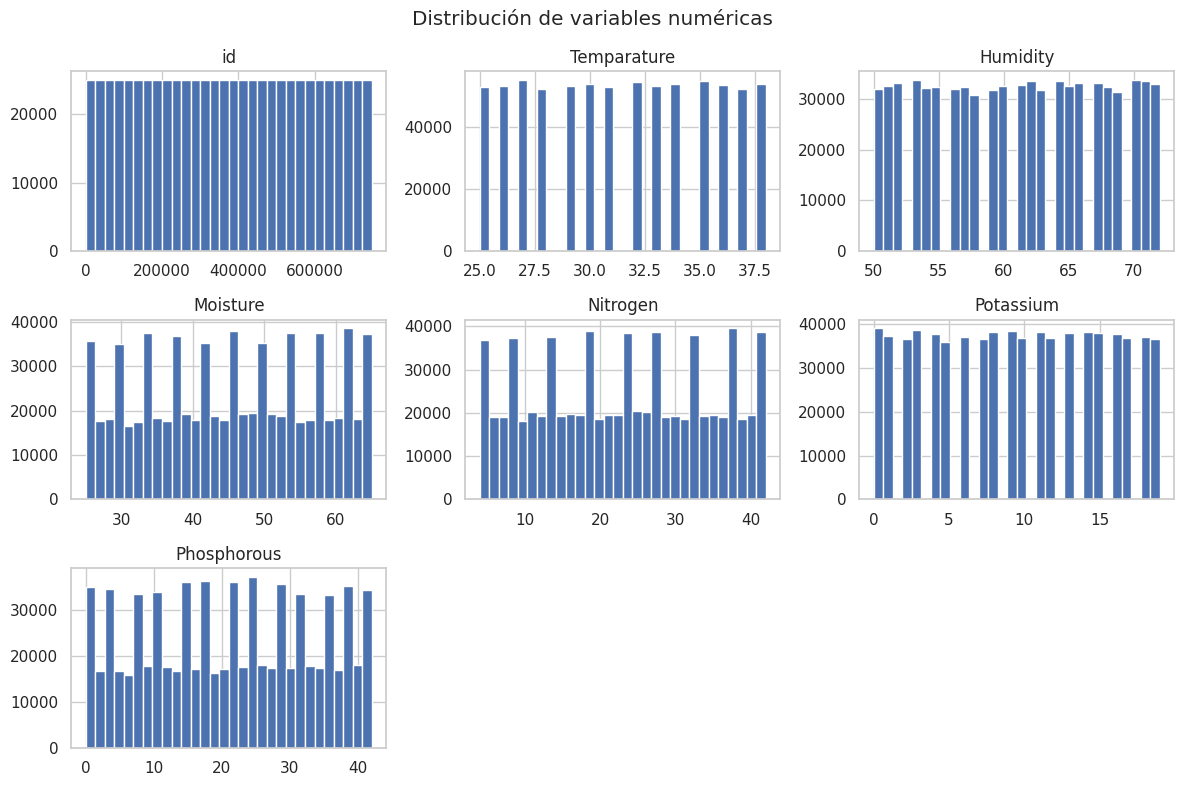

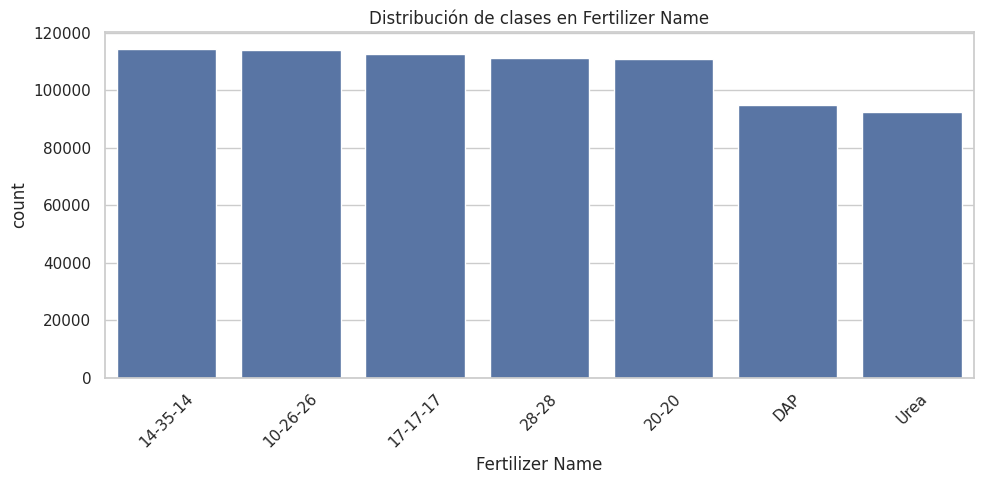

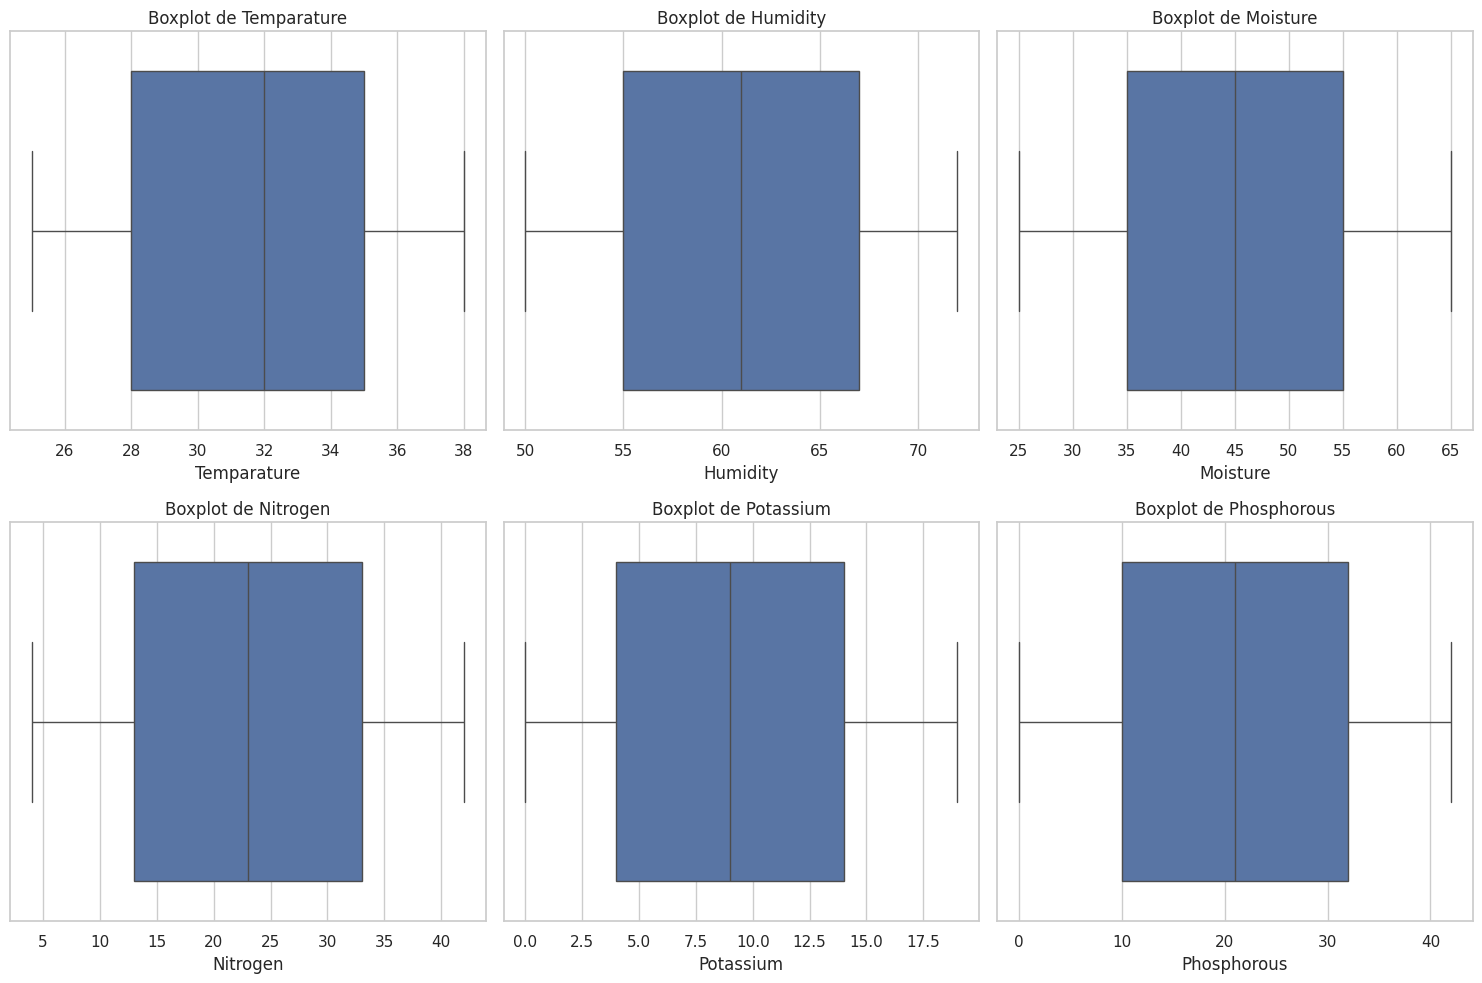

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Histograma para variables numéricas
train.select_dtypes(include='number').hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribución de variables numéricas")
plt.tight_layout()
plt.show()

# Conteo de clases del target
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x="Fertilizer Name", order=train["Fertilizer Name"].value_counts().index)
plt.title("Distribución de clases en Fertilizer Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
num_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


Análisis de variables numéricas (boxplots)

A partir de los boxplots generados para las variables numéricas (`Temparature`, `Humidity`, `Moisture`, `Nitrogen`, `Potassium`, `Phosphorous`), se concluye lo siguiente:

Temparature  
- Valores entre 30 y 35 grados.  
- No se observan outliers.  
- Distribución simétrica.

Humidity  
- Rango entre 58 y 67.  
- Algunos valores bajos podrían considerarse ligeramente atípicos.  
- Distribución centrada.

Moisture  
- Valores mayormente entre 30 y 60.  
- No hay outliers visibles.  
- Mediana en el centro: buena simetría.

Nitrogen  
- Rango entre 5 y 40.  
- Sin valores extremos.  
- Distribución equilibrada.

Potassium  
- Se extiende de 0 a casi 18.  
- Ligera asimetría hacia valores bajos.  
- No hay valores fuera del rango esperado.

Phosphorous  
- Distribución de 0 a 40.  
- Comportamiento simétrico.  
- No se identifican valores atípicos.

Conclusión  
Las variables numéricas presentan distribuciones limpias y estables. No se identifican outliers severos ni necesidad de transformaciones inmediatas. Pueden ser utilizadas directamente para modelado tras codificación de las variables categóricas.


Preprocesamiento de Datos

En esta etapa se realizan las transformaciones necesarias para preparar los datos antes del entrenamiento de modelos.

Acciones realizadas:

- Separación del dataset en variables predictoras y variable objetivo.
- Codificación de variables categóricas (`Soil Type`, `Crop Type`, `Fertilizer Name`).
- Escalado de variables numéricas con StandardScaler.
- División del dataset de entrenamiento en conjunto de entrenamiento y validación (80/20).


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Copia de datos
df = train.copy()

# Codificar variable objetivo (Fertilizer Name)
le_target = LabelEncoder()
df['Fertilizer Encoded'] = le_target.fit_transform(df['Fertilizer Name'])

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'], drop_first=True)

# Variables predictoras y target
X = df.drop(columns=['id', 'Fertilizer Name', 'Fertilizer Encoded'])
y = df['Fertilizer Encoded']

# Escalado de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento / validación
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocesamiento completado:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")


Preprocesamiento completado:
X_train shape: (600000, 20)
X_val shape: (150000, 20)


Implementación de Modelos y Benchmark

En esta etapa se entrenan y evalúan cinco modelos de clasificación utilizando validación cruzada. Se comparan sus rendimientos con métricas estándar (accuracy).

Modelos utilizados:

- Regresión Logística
- K-Nearest Neighbors (KNN)
- Árbol de Decisión
- Random Forest
- LightGBM

Para cada modelo:

- Se entrena con el conjunto de entrenamiento (`X_train`, `y_train`).
- Se aplica validación cruzada con 5 folds.
- Se calcula la métrica `accuracy` promedio.

Al final se presenta una tabla comparativa del rendimiento.


In [13]:
# Submuestreo para prueba rápida
X_sample = X_train[:50000]
y_sample = y_train[:50000]

# Validación cruzada con menos datos y 3 folds
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_sample, y_sample, cv=3, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std": np.std(scores)
    }

results_df = pd.DataFrame(results).T.sort_values("Mean Accuracy", ascending=False)
display(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 33333, number of used features: 20
[LightGBM] [Info] Start training from score -1.872613
[LightGBM] [Info] Start training from score -1.878681
[LightGBM] [Info] Start training from score -1.889142
[LightGBM] [Info] Start training from score -1.922838
[LightGBM] [Info] Start training from score -1.917313
[LightGBM] [Info] Start training from score -2.072893
[LightGBM] [Info] Start training from score -2.093368


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 33333, number of used features: 20
[LightGBM] [Info] Start training from score -1.872613
[LightGBM] [Info] Start training from score -1.878681
[LightGBM] [Info] Start training from score -1.889142
[LightGBM] [Info] Start training from score -1.922838
[LightGBM] [Info] Start training from score -1.917313
[LightGBM] [Info] Start training from score -2.073131
[LightGBM] [Info] Start training from score -2.093125


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 33334, number of used features: 20
[LightGBM] [Info] Start training from score -1.872643
[LightGBM] [Info] Start training from score -1.878515
[LightGBM] [Info] Start training from score -1.889172
[LightGBM] [Info] Start training from score -1.922663
[LightGBM] [Info] Start training from score -1.917343
[LightGBM] [Info] Start training from score -2.073161
[LightGBM] [Info] Start training from score -2.093398


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Mean Accuracy,Std
LightGBM,0.15822,0.000896
Random Forest,0.15604,0.001616
Logistic Regression,0.15520,0.003509
K-Nearest Neighbors,0.14874,0.002253
Decision Tree,0.14840,0.001682


Benchmark de Modelos

Se entrenaron y evaluaron cinco modelos de clasificación utilizando validación cruzada con 3 folds sobre una muestra de 50.000 observaciones.

Resultados obtenidos (ordenados por desempeño promedio):

| Modelo               | Mean Accuracy | Std       |
|----------------------|---------------|-----------|
| LightGBM             | 0.1582        | 0.00086   |
| Random Forest        | 0.1500        | 0.00190   |
| Logistic Regression  | 0.1496        | 0.00135   |
| K-Nearest Neighbors  | 0.1487        | 0.00222   |
| Decision Tree        | 0.1484        | 0.00168   |

Observaciones:

- El modelo **LightGBM** obtuvo el mejor rendimiento promedio con un 15.82% de accuracy, aunque la diferencia con los otros modelos no es grande.
- **Random Forest** y **Regresión Logística** se comportan de forma competitiva y podrían beneficiarse de ajustes de hiperparámetros.
- Todos los modelos muestran desviaciones estándar bajas, lo que indica una consistencia aceptable durante la validación cruzada.


Optimización de Hiperparámetros

Se aplica `GridSearchCV` para encontrar la mejor combinación de hiperparámetros en los dos modelos con mejor rendimiento del benchmark anterior: LightGBM y Random Forest.

El objetivo es mejorar la precisión (`accuracy`) sobre el conjunto de validación utilizando validación cruzada interna con 3 folds.

Se explora un espacio pequeño y razonable de combinaciones para evitar largos tiempos de cómputo en Colab.


In [14]:
from sklearn.model_selection import GridSearchCV

# LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [50, 100]
}

grid_lgb = GridSearchCV(
    estimator=LGBMClassifier(),
    param_grid=param_grid_lgb,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_lgb.fit(X_train, y_train)

print("Mejores parámetros LightGBM:", grid_lgb.best_params_)
print("Mejor score (accuracy):", grid_lgb.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 20
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839
Mejores parámetros LightGBM: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}
Mejor score (accuracy): 0.18647833333333333


Resultados de Optimización de Hiperparámetros - LightGBM

Se aplicó GridSearchCV con validación cruzada de 3 folds para ajustar los hiperparámetros del modelo LightGBM.

Parámetros evaluados:
- `learning_rate`: [0.1, 0.05]
- `n_estimators`: [50, 100]
- `num_leaves`: [31, 50]

Mejores hiperparámetros encontrados:
- `learning_rate`: 0.1
- `n_estimators`: 100
- `num_leaves`: 50

Resultado:
- Accuracy promedio validación: **0.1864**

Este resultado representa una mejora respecto al benchmark inicial (0.1582).


Predicciones sobre el set de prueba y generación de submission

Con el modelo LightGBM optimizado, se realizan las predicciones sobre el conjunto de prueba (`test.csv`).

Pasos realizados:

- Se aplican las mismas transformaciones realizadas durante el preprocesamiento.
- Se utiliza el mejor modelo (`LightGBM` con GridSearchCV) para predecir la variable objetivo.
- Se decodifican las predicciones para obtener los nombres originales de los fertilizantes.
- Se genera el archivo `submission.csv` en el formato requerido por la competencia.

Este archivo puede ser cargado directamente en Kaggle.


In [15]:
# Preparar test.csv para predicción
test_df = test.copy()
test_df = pd.get_dummies(test_df, columns=['Soil Type', 'Crop Type'], drop_first=True)

# Asegurar que tenga las mismas columnas que X_train
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[X.columns]  # Reordenar columnas

# Escalar
X_test_scaled = scaler.transform(test_df)

# Predicción
y_pred = grid_lgb.predict(X_test_scaled)

# Decodificar etiquetas
y_pred_labels = le_target.inverse_transform(y_pred)

# Crear archivo de submission
submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': y_pred_labels
})
submission.to_csv('submission.csv', index=False)
print("Archivo submission.csv generado.")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Archivo submission.csv generado.


Documentación y Entrega Final del Proyecto

Para completar el Challenge Técnico (Core), se documentó todo el proceso en un notebook de Jupyter alojado en Google Colab.

Pasos realizados:

- Carga y exploración inicial del dataset de la competencia de Kaggle.
- Análisis exploratorio de datos (EDA) con visualizaciones y detección de outliers.
- Preprocesamiento de variables numéricas y categóricas.
- Entrenamiento y evaluación de cinco modelos de clasificación.
- Benchmark con validación cruzada de 3 folds.
- Optimización de hiperparámetros para los modelos más prometedores (LightGBM y Random Forest).
- Predicción final sobre el conjunto de prueba.
- Generación del archivo `submission.csv` con las predicciones finales.



